In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('insurance.csv')

dataset.shape

(1338, 7)

Section 1

In [4]:
#Check for missing values in dataset
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

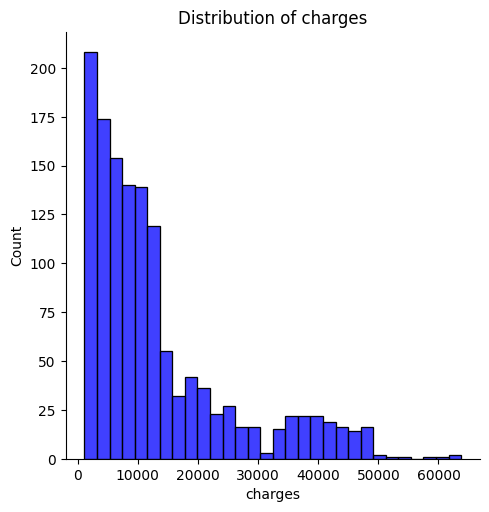

In [5]:
#Visualizing the distribution of charges
sns.displot(dataset, x="charges", color = 'b')
plt.title('Distribution of charges')
plt.show()

Session 2

<ipython-input-73-fe2078ae3c27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


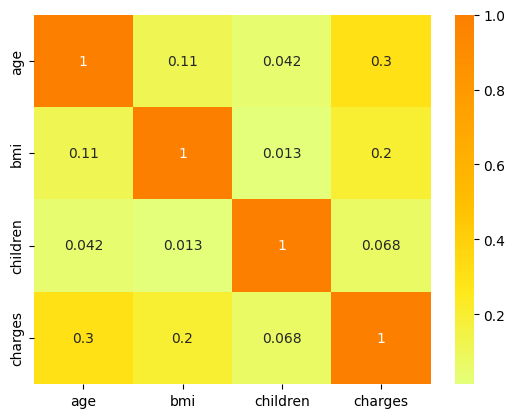

In [73]:
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

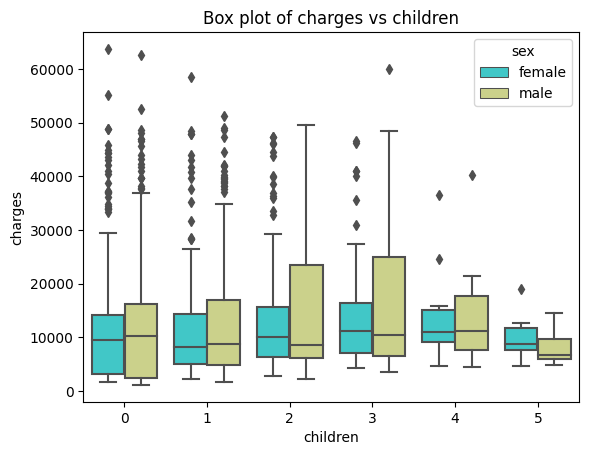

In [9]:
sns.boxplot(x='children', y='charges',hue='sex',data=dataset,palette='rainbow')
plt.title('Box plot of charges vs children');

In [27]:
#Removing dummy variables trap
categorical_columns = ['sex', 'children', 'smoker', 'region']
dataset_encode = pd.get_dummies(data = dataset, prefix = 'encoded', prefix_sep = '_',
                                columns = categorical_columns,
                                drop_first = True,
                                dtype = 'int8')

## Log transform
dataset_encode['charges'] = np.log(dataset_encode['charges'])



In [17]:
#Train test split
from sklearn.model_selection import train_test_split
x = dataset_encode.drop('charges',axis=1) # Independet variable
y = dataset_encode['charges'] # dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Add x0 = 1 to the dataset
x_train_0 = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_0 = np.c_[np.ones((x_test.shape[0], 1)), x_test]


#Build a model using the linear regression equation theta =(x^T*x)^−1 * x^T * y
theta = np.matmul(np.linalg.inv( np.matmul(x_train_0.T,x_train_0) ), np.matmul(x_train_0.T,y_train))



1195     9.843669
398      9.615034
576      7.417580
568      9.354692
1008    10.053694
          ...    
1158     7.807803
1202     7.628189
86      10.682329
816      7.952531
890     10.286400
Name: charges, Length: 1070, dtype: float64


In [12]:
#Test the model, evaluate the Model by calculating R^2 (the coefficient of determination)
y_predition = np.matmul(x_test_0, theta)

SSE = np.sum((y_predition - y_test) ** 2)
SST = np.sum((y_test - y_test.mean()) ** 2)
R_square = 1 - (SSE/SST)

print("The R square value is :", R_square)

#Mean Square Error calculation
MSE = np.sum((y_predition - y_test) ** 2) / x_test.shape[0]

print("The Mean Square Error :", MSE)

The R square value is : 0.8216574357727003
The Mean Square Error : 0.15191349154246286


**Tensorflow approach**

In [29]:
import os
os.environ['TPP_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


2.15.0


In [39]:
# Normalize the dataset
x_train_normalizer = preprocessing.Normalization()

# Adapt to the data
x_train_normalizer.adapt(np.array(x_train))

In [69]:
# Keras sequentiel model
model = tf.keras.Sequential([
    x_train_normalizer,
    layers.Dense(units = 1)
])

# Configure with keras
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
    loss = 'mean_squared_error'
)

# Train the Model
history = model.fit(
    x_train,
    y_train,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2
)

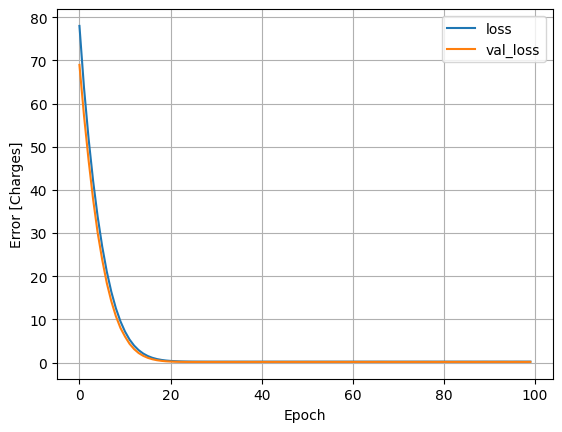

In [70]:
#Plot the loss vs validation loss of the model through epochs
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Charges]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [71]:
test_loss = model.evaluate(x_test, y_test, verbose = 0)
print("The loss of the test dataset:", test_loss)


The loss of the test dataset: 0.18076692521572113


9/9 [==============================] - 0s 2ms/step


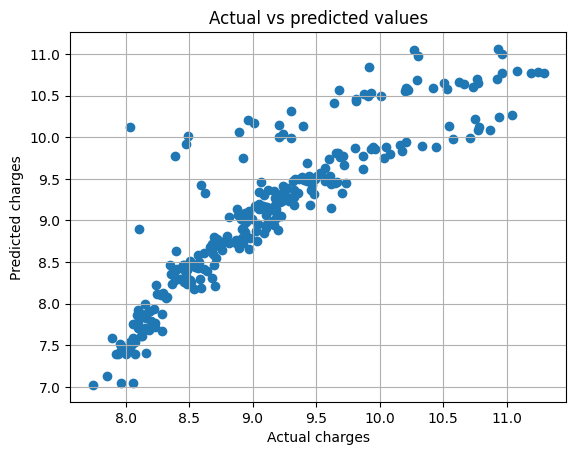

In [72]:
y_prediction = model.predict(x_test)

plt.scatter(y_prediction, y_test)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.grid(True)
plt.title('Actual vs predicted values')
plt.show()